In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
import json
#from utils import *

d:\machineLearning\miniconda\envs\pytorch-gpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
def generate_plots(list_of_dirs, legend_names, save_path):
    """ Generate plots according to log 
    :param list_of_dirs: List of paths to log directories
    :param legend_names: List of legend names
    :param save_path: Path to save the figs
    """
    assert len(list_of_dirs) == len(legend_names), "Names and log directories must have same length"
    data = {}
    for logdir, name in zip(list_of_dirs, legend_names):
        json_path = os.path.join(logdir, 'args.json')
        assert os.path.exists(os.path.join(logdir, 'args.json')), f"No json file in {logdir}"
        with open(json_path, 'r') as f:
            data[name] = json.load(f)
    
    for yaxis in ['eval_auc']:
        fig, ax = plt.subplots()
        for name in data:
            
            #num_iters = len(data[name]['train_losses'])
            ax.plot(data[name][yaxis], label=name)  
        ax.legend()
        ax.set_xlabel('training iterations')
        ax.set_ylabel(yaxis.replace('_', ' '))
        #fig.savefig(os.path.join(save_path, f'{yaxis}.png'))

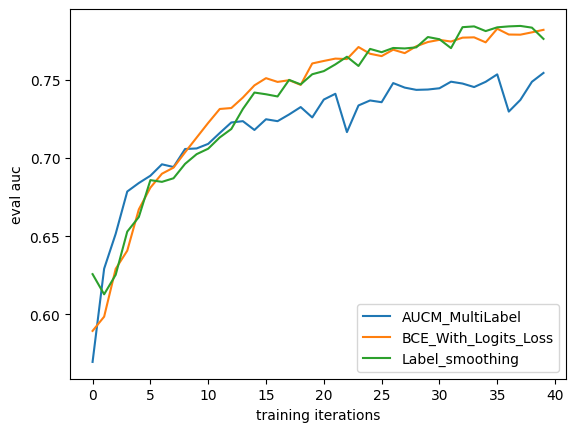

In [11]:
list_of_dirs = ['train_output/AUC', 'train_output/BCE', 'train_output/Smooth']
legend_names = ['AUCM_MultiLabel', 'BCE_With_Logits_Loss', 'Label_smoothing']
save_path = 'plot_out'
generate_plots(list_of_dirs, legend_names, save_path)

In [7]:
def generate_plots(list_of_dirs, legend_names, save_path):
    """ Generate plots according to log 
    :param list_of_dirs: List of paths to log directories
    :param legend_names: List of legend names
    :param save_path: Path to save the figs
    """
    assert len(list_of_dirs) == len(legend_names), "Names and log directories must have same length"
    data = {}
    for logdir, name in zip(list_of_dirs, legend_names):
        json_path = os.path.join(logdir, 'args.json')
        assert os.path.exists(os.path.join(logdir, 'args.json')), f"No json file in {logdir}"
        with open(json_path, 'r') as f:
            data[name] = json.load(f)
    
    for yaxis in ['train_losses', 'eval_accs', 'eval_losses']:
        fig, ax = plt.subplots(figsize=(8, 4))
        for name in data:
            if name == '6:BERT':
                num_iters = len(data[name]['train_losses']) * 703
                x_vals = np.arange(0, num_iters, 703) 
            else:
                num_iters = len(data[name]['train_losses']) * 5
                x_vals = np.arange(0, num_iters, 5) 
            ax.plot(x_vals, data[name][yaxis], label=name)  
        ax.legend()
        ax.set_xlabel('training iterations')
        ax.set_ylabel(yaxis.replace('_', ' '))
        fig.savefig(os.path.join(save_path, f'{yaxis}.png'))

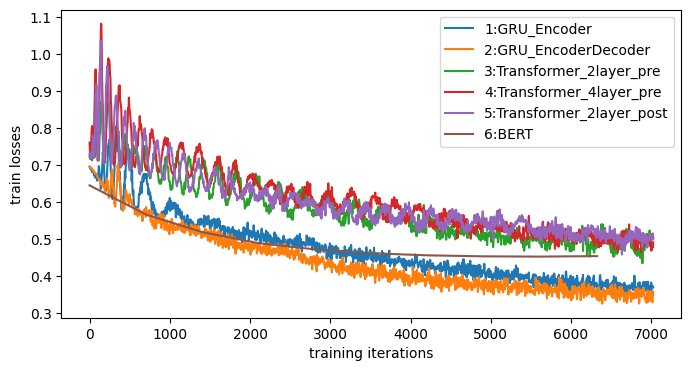

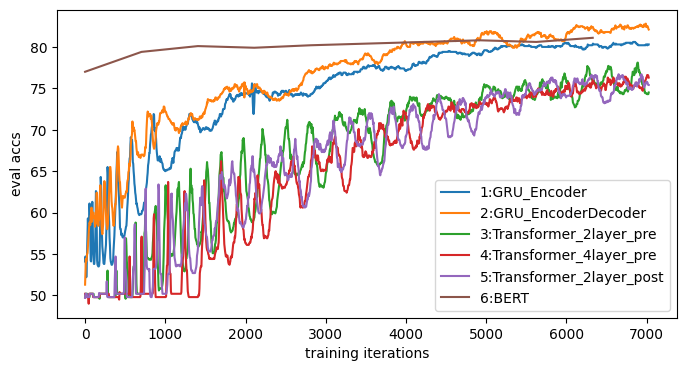

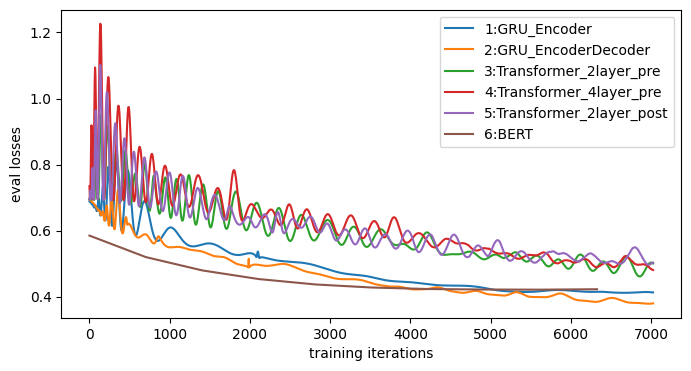

In [8]:
list_of_dirs = ['1', '2', '3', '4', '5', '6']
legend_names = ['1:GRU_Encoder', '2:GRU_EncoderDecoder', '3:Transformer_2layer_pre', '4:Transformer_4layer_pre', '5:Transformer_2layer_post', '6:BERT']
save_path = 'plot_out'
generate_plots(list_of_dirs, legend_names, save_path)

In [7]:

def generate_plots_1(list_of_dirs, legend_names, save_path):
    """ Generate plots according to log 
    :param list_of_dirs: List of paths to log directories
    :param legend_names: List of legend names
    :param save_path: Path to save the figs
    """
    assert len(list_of_dirs) == len(legend_names), "Names and log directories must have same length"
    data = {}
    for logdir, name in zip(list_of_dirs, legend_names):
        json_path = os.path.join(logdir, 'args.json')
        assert os.path.exists(os.path.join(logdir, 'args.json')), f"No json file in {logdir}"
        with open(json_path, 'r') as f:
            data[name] = json.load(f)
    
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    for name in data:
        num_iters = len(data[name]['train_losses'])
        #x_vals = np.arange(0, num_iters, )  # create array of x-axis values
        ax1.plot(data[name]['train_losses'], label=f"{name} Train Losses")
        ax2.plot(data[name]['eval_auc'], label=f"{name} Eval Accs", color='green')
        ax1.plot(data[name]['eval_losses'], label=f"{name} Eval Losses") 
    ax1.set_xlabel('training iterations')

    ax1.set_ylabel('AUC Losses')
    ax2.set_ylabel('AUC scores')
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(handles1+handles2, labels1+labels2, loc=5)
    #ax1.legend(loc=1)
    #ax2.legend(loc=1)
    ax1.set_title('learning curves for densenet121 with AUCM loss')
    fig.savefig(os.path.join(list_of_dirs[0]+'/all_plots.png'))

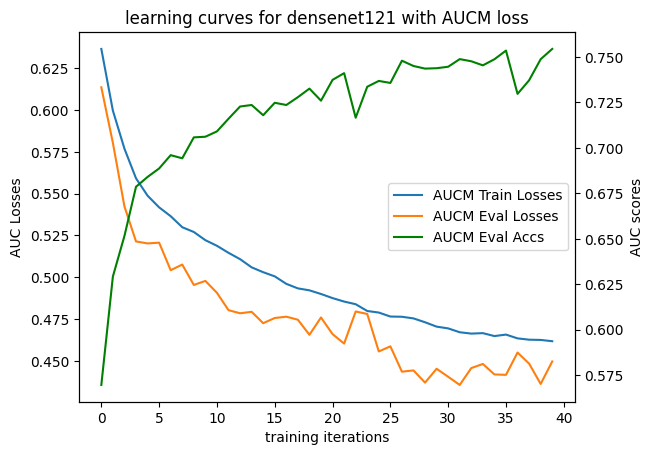

In [9]:
list_of_dirs = ['train_output/nih-densenet-densenet_aucm_0412_lr0005_mo07_40epoch']
legend_names = ['AUCM']
save_path = 'plot_out'
generate_plots_1(list_of_dirs, legend_names, save_path)

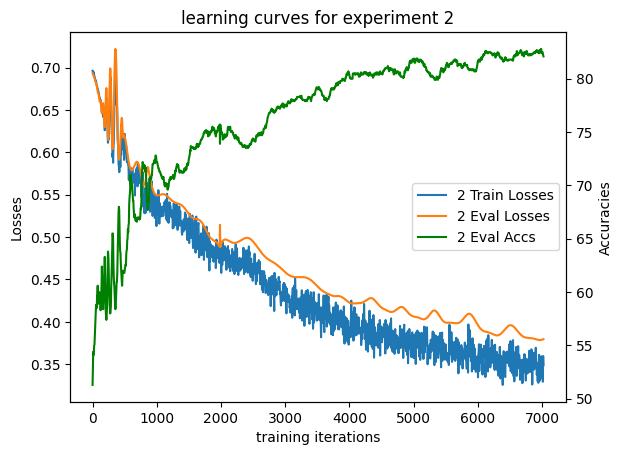

In [106]:
list_of_dirs = ['2']
legend_names = ['2']
save_path = 'plot_out'
generate_plots_1(list_of_dirs, legend_names, save_path)

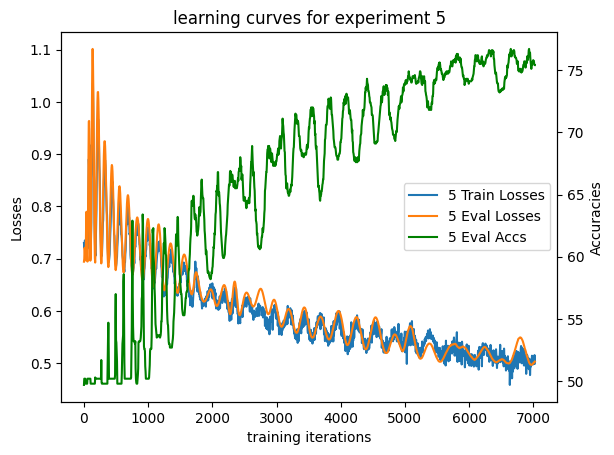

In [114]:
list_of_dirs = ['5']
legend_names = ['5']
save_path = 'plot_out'
generate_plots_1(list_of_dirs, legend_names, save_path)

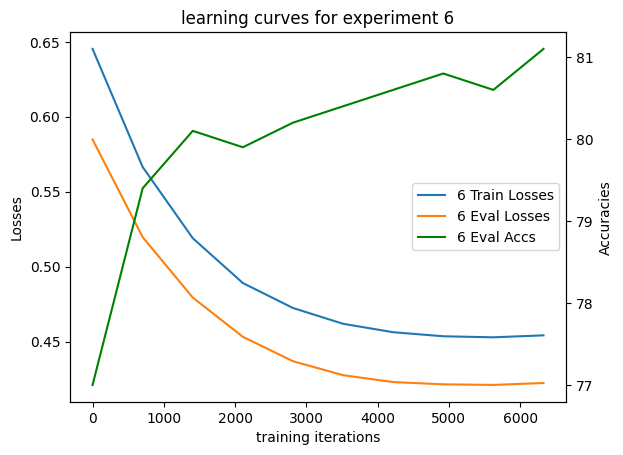

In [7]:
list_of_dirs = ['6']
legend_names = ['6']
save_path = 'plot_out'
generate_plots_1(list_of_dirs, legend_names, save_path)